# Template Matching
https://docs.opencv.org/4.x/de/da9/tutorial_template_matching.html

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


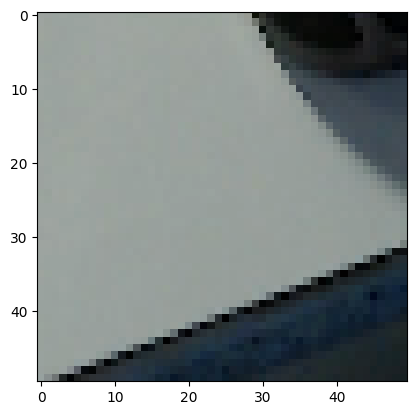

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# Function serach for the best match
def find_matching(image, template):
    # Convert to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    # Find the width and height of template in the image
    w, h = template_gray.shape[::-1]
    # Apply template Matching
    res = cv2.matchTemplate(image_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Get the best match position
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # Get the top-left position
    top_left = max_loc
    # Get the bottom-right position
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # Draw a rectangle around the matched region.
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    return image
    
    
# Function gets a ROI from the center of the image
def get_roi(image, roi_size):
    # Get the image size
    height, width = image.shape[:2]
    # Get the ROI size
    roi_height, roi_width = roi_size
    # Calculate the ROI position
    x = int((width - roi_width)/2)
    y = int((height - roi_height)/2)
    # Get the ROI from the image
    roi = image[y:y+roi_height, x:x+roi_width]
    return roi


cap = cv2.VideoCapture(1)

_, frame = cap.read()
frame = cv2.resize(frame, (400, 300))
template = get_roi(frame, (50, 50))

# Show the template
plt.imshow(template)

while(1):
    # Take each frame
    _, frame = cap.read()
    frame = cv2.resize(frame, (400, 300))
    # Search for the template
    frame = find_matching(frame, template)
    # Show the image
    cv2.imshow('Imagen',frame)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

